# Df 0 1 9_ Cache
This tutorial shows how the content of a data frame can be cached in memory
in form of a data frame. The content of the columns is stored in memory in
contiguous slabs of memory and is "ready to use", i.e. no ROOT IO operation
is performed.

Creating a cached data frame storing all of its content deserialised and uncompressed
in memory is particularly useful when dealing with datasets of a moderate size
(small enough to fit the RAM) over which several explorative loops need to be
performed at as fast as possible. In addition, caching can be useful when no file
on disk needs to be created as a side effect of checkpointing part of the analysis.

All steps in the caching are lazy, i.e. the cached data frame is actually filled
only when the event loop is triggered on it.




**Author:** Danilo Piparo  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:10 AM.</small></i>

In [1]:
import ROOT
RDataFrame = ROOT.ROOT.RDataFrame
import os

Welcome to JupyROOT 6.18/03


We create a data frame on top of the hsimple example

In [2]:
hsimplePath = os.path.join(str(ROOT.gROOT.GetTutorialDir().Data()), "hsimple.root")
df = RDataFrame("ntuple", hsimplePath)

e apply a simple cut and define a new column

In [3]:
df_cut = df.Filter("py > 0.f")\
           .Define("px_plus_py", "px + py")

We cache the content of the dataset. Nothing has happened yet: the work to accomplish
has been described.

In [4]:
df_cached = df_cut.Cache()

h = df_cached.Histo1D("px_plus_py")

Now the event loop on the cached dataset is triggered. This event triggers the loop
on the `df` data frame lazily.

In [5]:
h.Draw()

Draw all canvases 

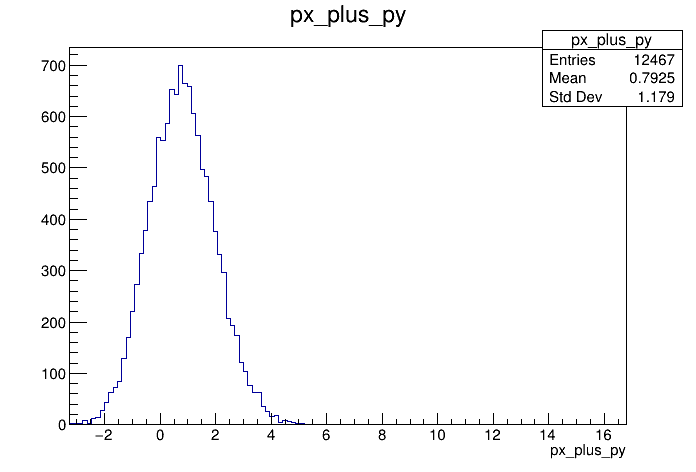

In [6]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()